# The Battle of the Neighborhoods

# Explore New York city and its Boroughs Cuisine dataset 

#### Cuisine and culture of specific regions in New York will help to understand  the kind of restaurant would be setup. The necessary chosen area for setup based on suitable cuisine based on dominnance of the said set of cuisines.

In [1]:
# library to handle data in a vectorized manner
# library for data analsysis
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

from PIL import Image 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.style.use('ggplot') # optional: for ggplot-like style

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import STOPWORDS, WordCloud

 # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# library to handle requests
import requests
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 
# map rendering library
import folium 
# implements classes to read and write tabular data in CSV form
import csv 

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.1.3
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining wordcloud==1.4.1: 100%|##########| 2/2 [00:00<00:00,  3.43it/s]
                                                                         

Examining conflict for python wordcloud:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - wordcloud==1.4.1 -> python[version='2.7.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda

In [2]:
import matplotlib.pyplot as plt
# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents
print('Libraries imported.')

Libraries imported.


In [3]:
# Number of borough
neighborhoods=pd.read_csv('NY_GEO.csv')
nbr = len(neighborhoods['Borough'].unique())
print(nbr)

5


In [4]:
#  now to create a PANDAS data frame
cols = ['Borough', 'Neighborhood', 'Cuisine']
df = pd.DataFrame(columns= cols)
print(df)

Empty DataFrame
Columns: [Borough, Neighborhood, Cuisine]
Index: []


In [5]:
# toclevel-1 tocsection-1
website_url = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City').text
soupy = BeautifulSoup(website_url,'html.parser')
#print(soupy.prettify())

results = []
articles = soupy.find_all('h3')
# Check if its the right element
count = 0
for article in articles:
    if(count == nbr):
        break
    else:
        count +=1
        title_key = article.span.get('id')
        artstr = article.find_next_sibling('div', class_="div-col columns column-width")
        allul = artstr.ul          
#      print(allul.text)
        for litag in allul.find_all('li'):
            finalstr = litag.text.replace(" – ", "%")
            finalstr = finalstr.replace(" - ", "%") 
            rows = finalstr.split('%')
            for titleone in title_key.split(','):
                titleone = titleone.replace("_"," ")
                for rowone in rows[0].split(';'):
                    rowone = rowone.replace(", ", " ")
                    rows[1] = rows[1].replace(" and ", ",")
                    rows[1] = rows[1].replace(",other ", ",")
                    rows[1] = rows[1].replace("-", " ")
                    rows[1] = rows[1].replace(", ", ",")
                    rows[1] = rows[1].replace(",,", ",")
                    rows[1] = rows[1].replace("; ", ",")
                    rows[1] = rows[1].replace(" (on 204th St.)", "")
                    rows[1] = rows[1].replace(" (formerly Irish,less so today)", "")
                    str1 = '(also known as ' + '"' + 'Arthur Avenue,' + '"' + ' "' + 'Little Italy' + '"' + ')'
                    rows[1] = rows[1].replace(str1, "")
                    rows[1] = rows[1].replace(" (formerly)", "")
                    for rowtwo in rows[1].split(','):
                        results.append(titleone)
                        results.append(rowone)
                        results.append(rowtwo) 
        
# Number of elements in List
elenum = len(results)
print(elenum)

headers = ['Borough','Neighbourhood','Cuisine']
with open('NY_CUISINE1.csv', 'w') as csvfile:   
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    i = 0
    for cnt in range(0,len(results)):
        newlist = []
        if i == 0:
            newlist.append(results[cnt:cnt+3])   
            writer.writerows(newlist)
            i += 1    
        elif i  < 2:
            i += 1     
        else:
            i = 0

726


In [6]:
cuisine_data = pd.read_csv('NY_CUISINE1.csv')

In [7]:
df = pd.DataFrame(cuisine_data)
# removing Staten Island data from dataframe because it in incorrect data in HTML parsing
final_data = df[cuisine_data['Borough'] != 'Staten Island'].reset_index(drop=True)

In [8]:
# Addinng Correct data for  Staten Island

si_df = pd.DataFrame({'Borough':['Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island','Staten Island'],
             'Neighbourhood':['Port Richmond','Port Richmond','Port Richmond','South Beach','South Beach','South Beach','South Beach','Rossville','Rossville','Rossville','Rossville','Great Kills','Great Kills','Great Kills','Great Kills','Tompkinsville','Tompkinsville','Tompkinsville','Tompkinsville'],
                                   'Cuisine':['Mexican','Indian','Italian','Italian','Russian','Arab','Polish','Italian','Russian','Arab','Polish','Italian','Russian','Arab','Polish','Italian','Sri Lankan','Pakistani','Indian']})

final_data = final_data.append(si_df,ignore_index=True)

In [11]:
# Saving Final data into CSV file
final_data.to_csv('NY_CUISINE.csv')

In [13]:
fnl_data = pd.read_csv('NY_CUISINE.csv',)
fnl_data.head()

,Unnamed: 0,Borough,Neighbourhood,Cuisine
0,0,The Bronx,Bedford Park,Mexican
1,1,The Bronx,Bedford Park,Puerto Rican
2,2,The Bronx,Bedford Park,Dominican
3,3,The Bronx,Bedford Park,Korean
4,4,The Bronx,Belmont,Italian


#### Combining rows with common Borough and Neighborhoods and separating by comma

In [14]:
df_comma = fnl_data.groupby(['Borough','Neighbourhood'], sort=False)['Cuisine'].apply(', '.join).reset_index()
df_comma.head()

,Borough,Neighbourhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [15]:
# Validating Unique  Borough data
print(df_comma.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Manhattan' 'Staten Island']


In [16]:
df_comma.shape

(64, 3)

## NEW YORK CITY CUISINE - WORD CLOUD

In [17]:
df_comma['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,18
Manhattan,13
The Bronx,9
Staten Island,5


In [18]:
CUISINE_WC = df_comma[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [19]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [20]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

#### Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [21]:
# setting to remove any redundant stopwords
stopwords = set(STOPWORDS)

In [22]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stopwords
)
# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

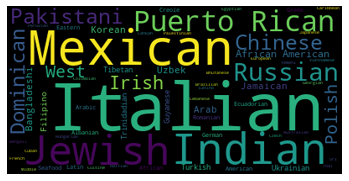

<Figure size 3240x3240 with 0 Axes>

In [23]:
# The word cloud is created, let's visualize it. display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='spline16')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(45)
plt.show()

#### BROOKLYN CUISINE - WORD CLOUD 

In [24]:
Brooklyn_data = df_comma[df_comma['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighbourhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani, Ukrainian"


In [46]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC.head()

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani, Ukrainian"


In [47]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [48]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [49]:
stopwords = set(STOPWORDS)

In [50]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stopwords
)
# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

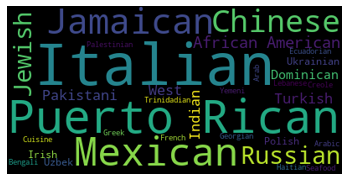

<Figure size 3240x3240 with 0 Axes>

In [51]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='spline16')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(45)
plt.show()

#### Queens Cuisine - WORD CLOUD 

In [ ]:
#  filter data for Queen's Cuisine
Queens_data = df_comma[df_comma['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

In [65]:
# Selecting Cuisine for word cloud
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,"Indian, Pakistani"
2,"Chinese, Korean"
3,"Jewish, Russian, Uzbek"
4,"Jewish, Russian, Uzbek"
5,"Jewish, Russian, Uzbek"
6,Italian
7,Italian
8,"German, Polish"
9,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."


In [66]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [67]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [68]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stopwords
)
# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

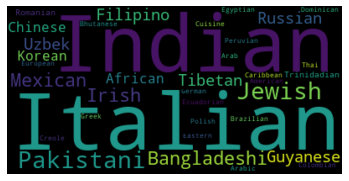

<Figure size 2160x3240 with 0 Axes>

In [70]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(45)
plt.show()

#### Manhattan Cuisine - WORD CLOUD 

In [72]:
# Selecting Cuisine specufic to Manhattan
Manhattan_data = df_comma[df_comma['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighbourhood,Cuisine
0,Manhattan,Chinatown,"Chinese, Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian, Ukrainian"
3,Manhattan,Greenwich Village,"Italian, Middle Eastern"
4,Manhattan,Harlem,"Italian, African American, Latin American, Wes..."


In [73]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,"Chinese, Vietnamese"
1,"Puerto Rican, Mexican, Dominican, Chinese Cuba..."
2,"Japanese, Korean, Indian, Ukrainian"
3,"Italian, Middle Eastern"
4,"Italian, African American, Latin American, Wes..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, Latin American"
9,"Indian, Pakistani, Bangladeshi"


In [74]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [75]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [76]:
stopwords = set(STOPWORDS)

In [77]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='Black',
    max_words=200,
    stopwords=stopwords
)
# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

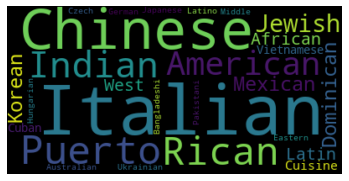

<Figure size 2160x3240 with 0 Axes>

In [78]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(45)
plt.show()

#### The Staten Island Cuisine - WORD CLOUD

In [86]:
# The Staten Island - WORD CLOUD
SI_data = df_comma[df_comma['Borough'] == 'Staten Island'].reset_index(drop=True)
SI_data.head()

,Borough,Neighbourhood,Cuisine
0,Staten Island,Port Richmond,"Mexican, Indian, Italian"
1,Staten Island,South Beach,"Italian, Russian, Arab, Polish"
2,Staten Island,Rossville,"Italian, Russian, Arab, Polish"
3,Staten Island,Great Kills,"Italian, Russian, Arab, Polish"
4,Staten Island,Tompkinsville,"Italian, Sri Lankan, Pakistani, Indian"


In [87]:
SI_CUISINE_WC = Bronx_data[['Cuisine']]
SI_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [88]:
SI_CUISINE_WC.to_csv('SI_CUISINE.txt', sep=',', index=False)

In [89]:
SI_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [90]:
stopwords = set(STOPWORDS)

In [91]:
# instantiate a word cloud object
SI_CUISINE_NYC = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
SI_CUISINE_NYC.generate(SI_CUISINE_WC)

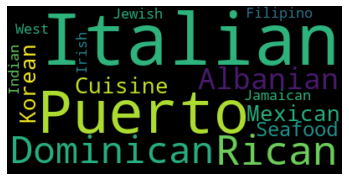

<Figure size 3240x3240 with 0 Axes>

In [92]:
# display the word cloud
plt.imshow(SI_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(45)
plt.show()


#### The Bronx Cuisine - WORD CLOUD

In [79]:
#  Data selection for cuisine specific to The Bronx - WORD CLOUD
Bronx_data = df_comma[df_comma['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighbourhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [80]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [81]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [82]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [83]:
stopwords = set(STOPWORDS)

In [84]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

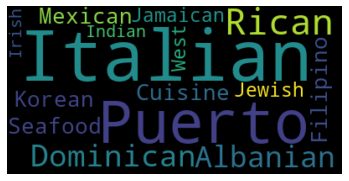

<Figure size 2160x3240 with 0 Axes>

In [85]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()


In [93]:
fnl_data['Cuisine'].to_csv('diff_cuisine.txt', sep=',')
diff_cuisine = open('diff_cuisine.txt', 'r').read()

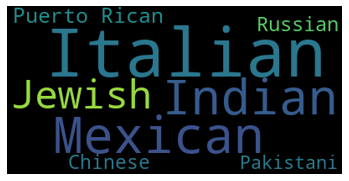

<Figure size 3600x3600 with 0 Axes>

In [94]:
cloud = WordCloud(
    background_color='black',
    max_words=8,
)
cloud.generate(diff_cuisine)
plt.imshow(cloud, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

#### Most Preferred Cuisine in New York - Italian, Jewish, Indian, Mexican, Chinese, Pakistani, Russian, Puerto Rican

### In NYC the dominant cuisines are the ones mentioned above. We are analyzing cuisines specific to the boroughs. 

In [103]:
Bronx = fnl_data[fnl_data['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx = Bronx['Cuisine']
Bronx.to_csv('bronx.txt', sep=',')
Bronx = open('bronx.txt', 'r').read()

Queens = fnl_data[fnl_data['Borough'] == 'Queens'].reset_index(drop=True)
Queens = Queens['Cuisine']
Queens.to_csv('queens.txt', sep=',')
Queens = open('queens.txt', 'r').read()

Brooklyn = fnl_data[fnl_data['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn = Brooklyn['Cuisine']
Brooklyn.to_csv('brooklyn.txt', sep=',')
Brooklyn = open('brooklyn.txt', 'r').read()

State_island = fnl_data[fnl_data['Borough'] == 'Staten Island'].reset_index(drop=True)
State_island = State_island['Cuisine']
State_island.to_csv('island.txt', sep=',')
State_island = open('island.txt', 'r').read()

Manhattan = fnl_data[fnl_data['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan = Manhattan['Cuisine']
Manhattan.to_csv('manhattan.txt', sep=',')
Manhattan = open('manhattan.txt', 'r').read()

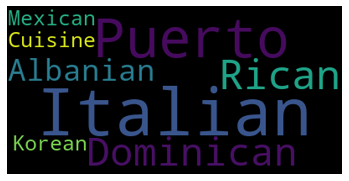

<Figure size 3600x3600 with 0 Axes>

In [104]:
# The_Bronx
cloud1 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud1.generate(Bronx)
plt.imshow(cloud1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

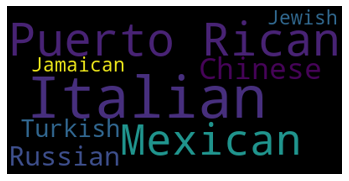

<Figure size 3600x3600 with 0 Axes>

In [105]:
# Brooklyn
cloud1 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud1.generate(Brooklyn)
plt.imshow(cloud1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

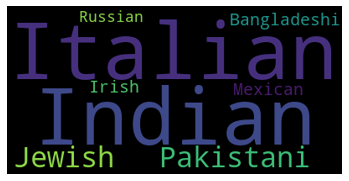

<Figure size 3600x3600 with 0 Axes>

In [106]:
# Queens
cloud1 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud1.generate(Queens)
plt.imshow(cloud1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

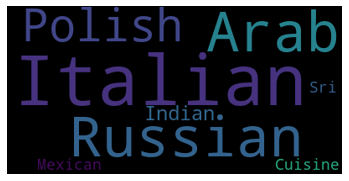

<Figure size 3600x3600 with 0 Axes>

In [107]:
# State_island
cloud1 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud1.generate(State_island)
plt.imshow(cloud1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

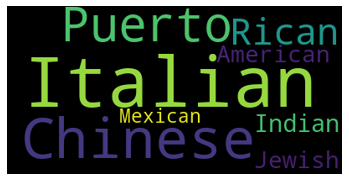

<Figure size 3600x3600 with 0 Axes>

In [108]:
# Manhattan
cloud1 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud1.generate(Manhattan)
plt.imshow(cloud1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()